<a href="https://colab.research.google.com/github/VictorFu0717/ml0311/blob/main/cnn_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

卷積(特徵的萃取)：（過濾）以某px為中心，結合附近得值-->新值
邊緣檢測(sobel)

池化(減低計算量)：通常選最大值池化
做幾層要看原圖的大小,大：多層,小：少層

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# mnist: 60000, 28, 28 -> 60000, 28, 28, 1
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
trans = [       
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

airplane


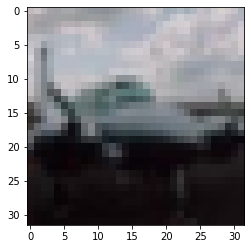

In [ ]:
import random
import matplotlib.pyplot as plt
idx = random.randint(0, 49999)
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D 
#flatten 讓他變成同一個維度
#第一層param: 64 * (1個filter)27 + 64bias = 1792
#第二層param: 128 * 576 + 128bias =  73856
layers = [
    # 一個filter(27) * 64 + 64(bias)
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576 * 128 + 128
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
#  不需要自己做one-hot
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test/ 255


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True),
   ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 39s - loss: 1.7096 - accuracy: 0.3635 - val_loss: 1.4304 - val_accuracy: 0.4802
Epoch 2/50
225/225 - 8s - loss: 1.3225 - accuracy: 0.5180 - val_loss: 1.1790 - val_accuracy: 0.5738
Epoch 3/50
225/225 - 8s - loss: 1.1343 - accuracy: 0.5947 - val_loss: 1.0680 - val_accuracy: 0.6168
Epoch 4/50
225/225 - 8s - loss: 0.9972 - accuracy: 0.6460 - val_loss: 0.9708 - val_accuracy: 0.6590
Epoch 5/50
225/225 - 8s - loss: 0.8980 - accuracy: 0.6829 - val_loss: 0.8942 - val_accuracy: 0.6862
Epoch 6/50
225/225 - 8s - loss: 0.8126 - accuracy: 0.7131 - val_loss: 0.8498 - val_accuracy: 0.7026
Epoch 7/50
225/225 - 8s - loss: 0.7491 - accuracy: 0.7373 - val_loss: 0.7968 - val_accuracy: 0.7250
Epoch 8/50
225/225 - 8s - loss: 0.6906 - accuracy: 0.7572 - val_loss: 0.7249 - val_accuracy: 0.7502
Epoch 9/50
225/225 - 8s - loss: 0.6391 - accuracy: 0.7767 - val_loss: 0.7092 - val_accuracy: 0.7534
Epoch 10/50
225/225 - 8s - loss: 0.5819 - accuracy: 0.7966 - val_loss: 0.6904 - val_accuracy: 0.766

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6703 - accuracy: 0.7701


[0.6703417897224426, 0.7700999975204468]

In [ ]:
pre = model.predict_classes(x_test_norm)
pre

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test_r = y_test.reshape(-1)
y_test_r.shape

(10000,)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/predict_classes
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
       columns=[trans[i] + "(預測)" for i in range(10)],
       index=[trans[i] + "(正確)" for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),834,11,28,8,16,3,10,9,50,31
automobile(正確),18,857,3,5,1,3,4,2,8,99
bird(正確),64,4,691,38,74,34,51,26,6,12
cat(正確),20,10,77,562,81,128,54,32,10,26
deer(正確),21,3,59,26,771,29,27,56,6,2
dog(正確),14,4,52,155,51,632,16,53,6,17
frog(正確),5,6,51,44,41,11,821,5,6,10
horse(正確),11,0,40,24,69,36,2,803,2,13
ship(正確),58,25,9,11,5,2,3,4,849,34
truck(正確),27,42,8,7,3,4,3,9,16,881


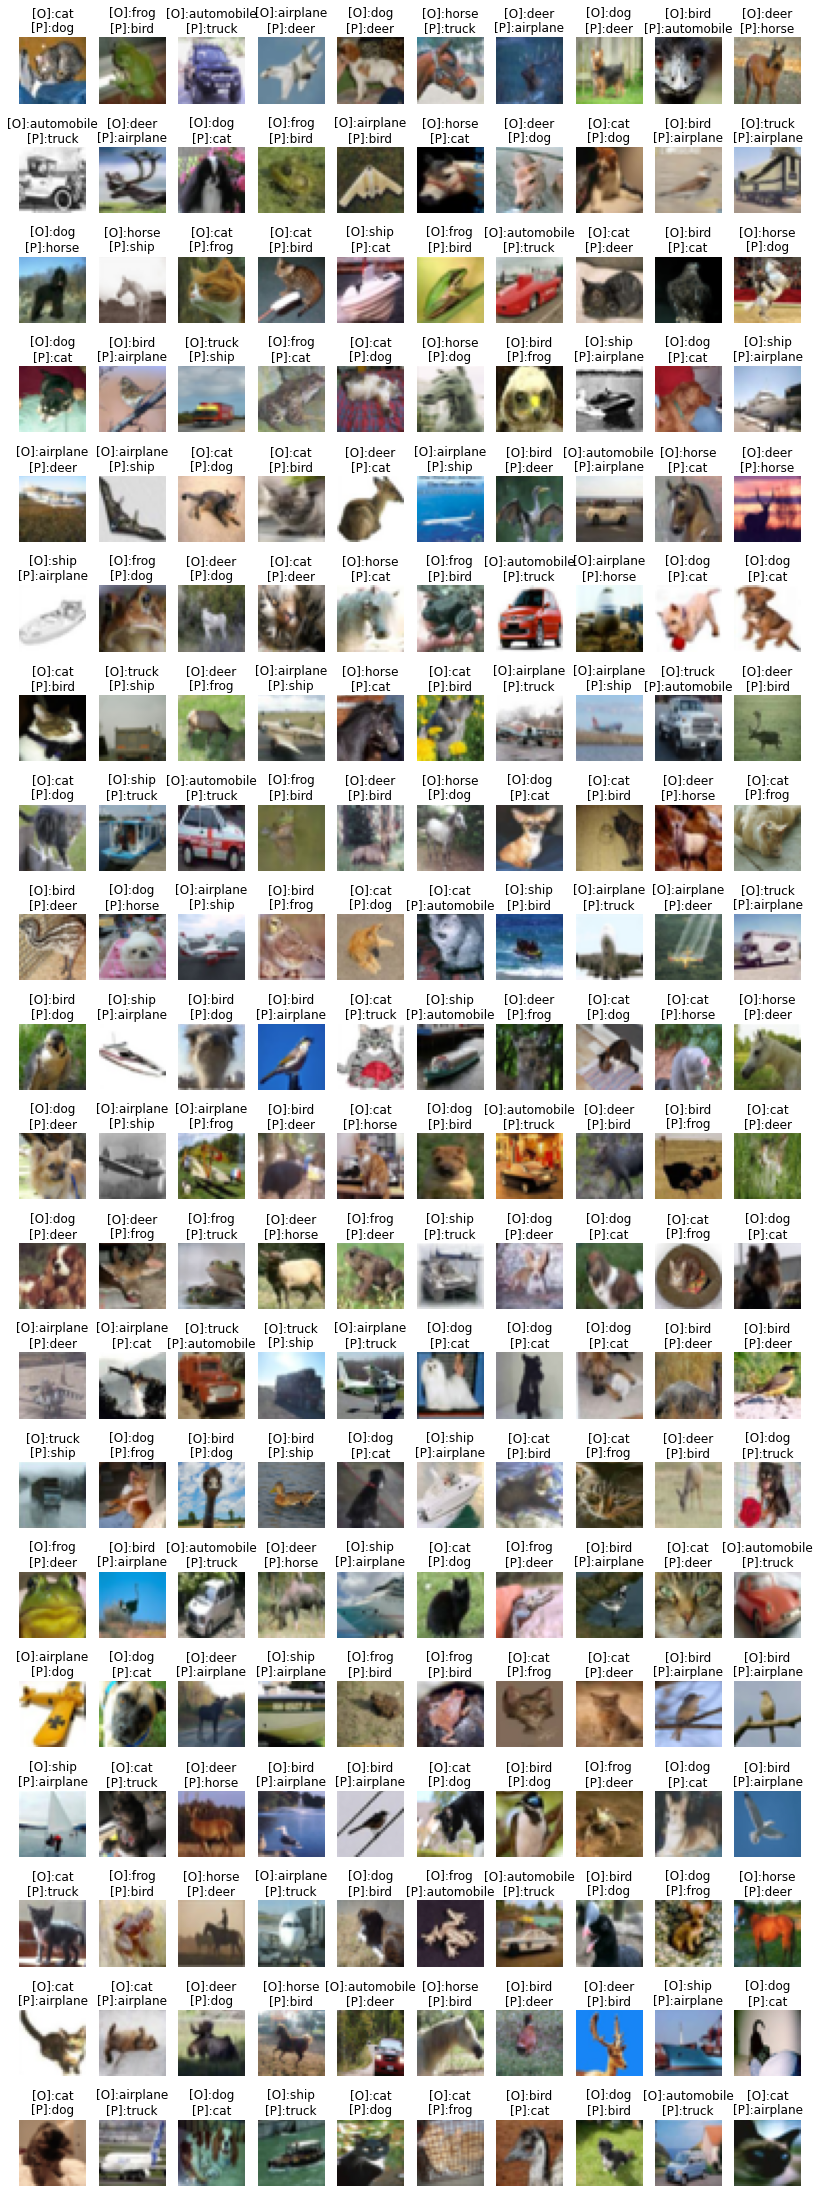

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0][:200]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test_r[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# Pillow
import requests
from PIL import Image
# RGB, RGBA, L(gray)
url = input("url:")
headers = {
  "user-agent":"user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"  
}
response = requests.get(url, headers=headers, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 32, 32, 3) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(trans[i], "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", trans[ans])
plt.imshow(img_np)